### Name: Abdulmanan
### Roll Number: 22i-2391

#### Phase 1 – Dataset Loading

In [2]:
from sklearn.datasets import fetch_california_housing
import numpy as np

In [3]:
data = fetch_california_housing()

X = data.data
Y = data.target

In [4]:
print("Feature Names: ")
for name in (data.feature_names):
    print(name)
print("-----------------------------------------------------")
print("Feature Values: ",X)
print("-----------------------------------------------------")
print("Target Values",Y)

Feature Names: 
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
-----------------------------------------------------
Feature Values:  [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
-----------------------------------------------------
Target Values [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
def print_table(headers, data_array, rows=5):
    print(" | ".join(f"{h:^10}" for h in headers))
    print("-" * (len(headers) * 13))  
    for row in data_array[:rows]:
        print(" | ".join(f"{val:^10.5f}" for val in row))
print_table(data.feature_names, X, rows=5)

  MedInc   |  HouseAge  |  AveRooms  | AveBedrms  | Population |  AveOccup  |  Latitude  | Longitude 
--------------------------------------------------------------------------------------------------------
 8.32520   |  41.00000  |  6.98413   |  1.02381   | 322.00000  |  2.55556   |  37.88000  | -122.23000
 8.30140   |  21.00000  |  6.23814   |  0.97188   | 2401.00000 |  2.10984   |  37.86000  | -122.22000
 7.25740   |  52.00000  |  8.28814   |  1.07345   | 496.00000  |  2.80226   |  37.85000  | -122.24000
 5.64310   |  52.00000  |  5.81735   |  1.07306   | 558.00000  |  2.54795   |  37.85000  | -122.25000
 3.84620   |  52.00000  |  6.28185   |  1.08108   | 565.00000  |  2.18147   |  37.85000  | -122.25000


#### Phase 2 – Exploratory Data Analysis

In [6]:
for i,feature in enumerate(data.feature_names):
    col = X[:,i]
    print(f"Feature: {feature}")
    print(f"  Mean:   {np.mean(col)}")
    print(f"  Median: {np.median(col)}")
    print(f"  Min:    {np.min(col)}")
    print(f"  Max:    {np.max(col)}")
    print(f"  Std:    {np.std(col)}")

Feature: MedInc
  Mean:   3.8706710029069766
  Median: 3.5347999999999997
  Min:    0.4999
  Max:    15.0001
  Std:    1.8997756945748738
Feature: HouseAge
  Mean:   28.639486434108527
  Median: 29.0
  Min:    1.0
  Max:    52.0
  Std:    12.585252725724606
Feature: AveRooms
  Mean:   5.428999742190376
  Median: 5.229128787878788
  Min:    0.8461538461538461
  Max:    141.9090909090909
  Std:    2.474113202333516
Feature: AveBedrms
  Mean:   1.096675149606208
  Median: 1.048780487804878
  Min:    0.3333333333333333
  Max:    34.06666666666667
  Std:    0.4738993762577447
Feature: Population
  Mean:   1425.4767441860465
  Median: 1166.0
  Min:    3.0
  Max:    35682.0
  Std:    1132.4346877576147
Feature: AveOccup
  Mean:   3.0706551594363742
  Median: 2.818115654360196
  Min:    0.6923076923076923
  Max:    1243.3333333333333
  Std:    10.385797959128217
Feature: Latitude
  Mean:   35.63186143410852
  Median: 34.26
  Min:    32.54
  Max:    41.95
  Std:    2.135900653797483
Feature: Lo

In [7]:
from scipy.stats import skew

for i,feature in enumerate(data.feature_names):
    col = X[:,i]
    print(f"Feature Name: {feature}")
    print(f"Skewness: {skew(col)}")
    print("-----------------------")

Feature Name: MedInc
Skewness: 1.64653702990008
-----------------------
Feature Name: HouseAge
Skewness: 0.060326253016611
-----------------------
Feature Name: AveRooms
Skewness: 20.69636472075093
-----------------------
Feature Name: AveBedrms
Skewness: 31.31468025924821
-----------------------
Feature Name: Population
Skewness: 4.9354995088585225
-----------------------
Feature Name: AveOccup
Skewness: 97.63246492211685
-----------------------
Feature Name: Latitude
Skewness: 0.4659191401627139
-----------------------
Feature Name: Longitude
Skewness: -0.2977795649858686
-----------------------


### Visualization 

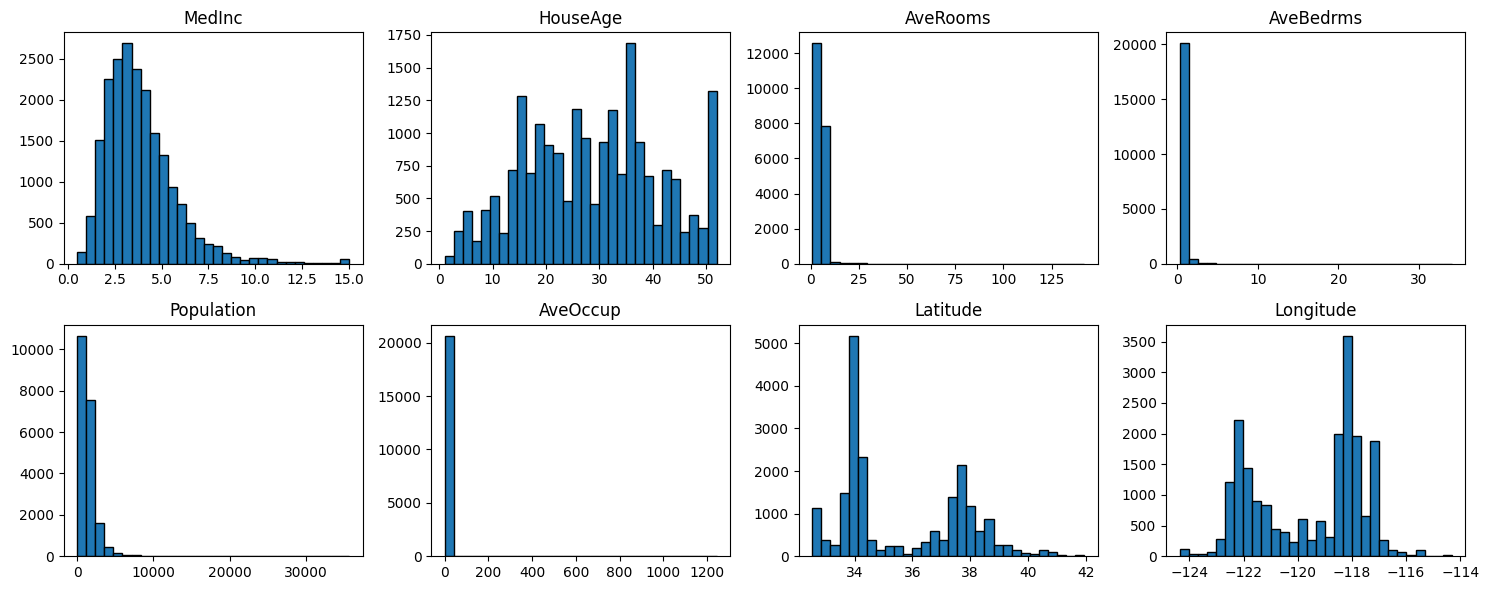

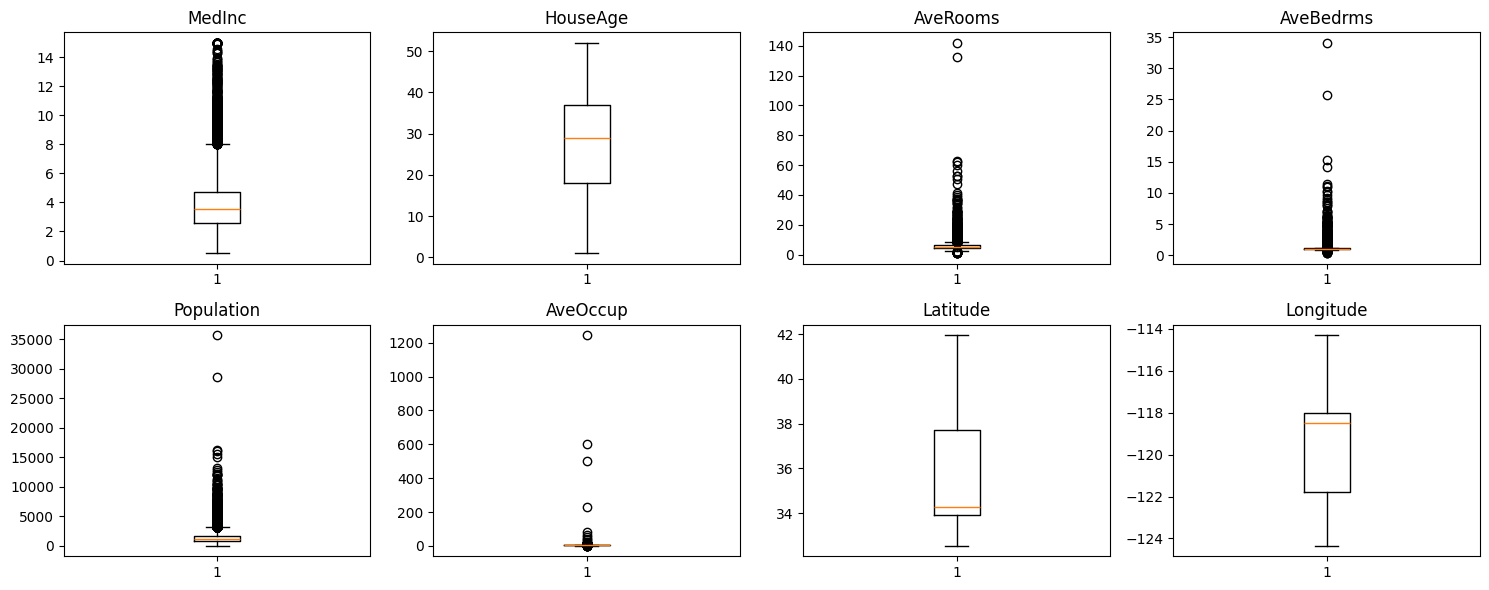

In [8]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,4,figsize=(15,6))
for i,ax in enumerate(axes.ravel()):
    ax.hist(X[:,i],bins=30,edgecolor="black")
    ax.set_title(data.feature_names[i])

  
plt.tight_layout()
plt.show()


fig,axes = plt.subplots(2,4,figsize=(15,6))
for i,ax in enumerate(axes.ravel()):
    ax.boxplot(X[:,i])
    ax.set_title(data.feature_names[i])

plt.tight_layout()
plt.show()




-   **Balanced Features**:
    -   *HouseAge*, *Latitude*, *Longitude*\
        These features have fairly symmetric distributions.
-   **Moderately Skewed**:
    -   *MedInc*\
        A few high-income districts cause moderate skewness in the
        distribution.
-   **Highly Skewed (Outliers)**:
    -   *AveRooms*, *AveBedrms*, *Population*, *AveOccup*\
        These features contain strong skewness and outliers, requiring
        special attention during preprocessing.


[[ 1.         -0.11903399  0.32689543 -0.06204013  0.00483435  0.01876625
  -0.07980913 -0.01517587]
 [-0.11903399  1.         -0.15327742 -0.07774728 -0.29624424  0.01319136
   0.01117267 -0.10819681]
 [ 0.32689543 -0.15327742  1.          0.84762133 -0.07221285 -0.00485229
   0.10638897 -0.02754005]
 [-0.06204013 -0.07774728  0.84762133  1.         -0.0661974  -0.0061812
   0.06972113  0.01334439]
 [ 0.00483435 -0.29624424 -0.07221285 -0.0661974   1.          0.06986273
  -0.10878475  0.09977322]
 [ 0.01876625  0.01319136 -0.00485229 -0.0061812   0.06986273  1.
   0.00236618  0.00247582]
 [-0.07980913  0.01117267  0.10638897  0.06972113 -0.10878475  0.00236618
   1.         -0.92466443]
 [-0.01517587 -0.10819681 -0.02754005  0.01334439  0.09977322  0.00247582
  -0.92466443  1.        ]]


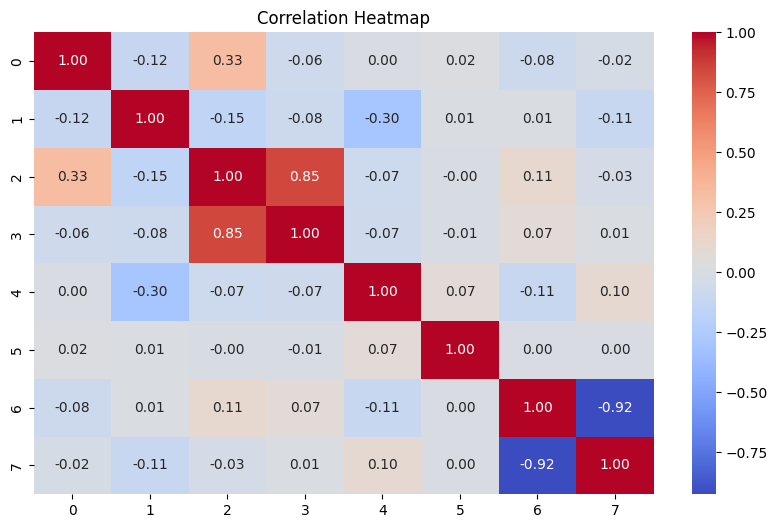

In [9]:
import seaborn as sns
corr_matrix = np.corrcoef(X,rowvar=False)
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix , annot= True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



Yes, It is very important to check correlation between features. As it tells us how much two features are dependent on each other. Highly correlated features can cause problems (Multicollinearity, Redundancy). Unexpected strong correlations can reveal data leaks, duplicated variables, or measurement errors.

#### Phase 3– Regression Experiments

##### Single-Column Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
X_single = X[:,[0]]
model = LinearRegression()
model.fit(X_single,Y)
y_pred = model.predict(X_single)
print(f"MSE: {mean_squared_error(Y,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y,y_pred)}")
print(f"R2 Score: {r2_score(Y,y_pred)}")
mse = mean_squared_error(Y, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)

MSE: 0.7011311502929527
Mean Absolute Error: 0.626259337911434
R2 Score: 0.4734474918071989
RMSE:  0.8373357452616917


##### SGD Regressor

In [11]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_single, Y)
y_pred = model.predict(X_single)
y_pred = model.predict(X_single)
print(f"MSE: {mean_squared_error(Y,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y,y_pred)}")
print(f"R2 Score: {r2_score(Y,y_pred)}")
mse = mean_squared_error(Y, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)

MSE: 0.7028285698355393
Mean Absolute Error: 0.6215425623869905
R2 Score: 0.47217272243312236
RMSE:  0.8383487161292366


##### Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_single)

model = LinearRegression()
model.fit(X_poly, Y)
y_pred = model.predict(X_poly)
print(f"MSE: {mean_squared_error(Y,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y,y_pred)}")
print(f"R2 Score: {r2_score(Y,y_pred)}")
mse = mean_squared_error(Y, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)

MSE: 0.6841567521484683
Mean Absolute Error: 0.6167700265297873
R2 Score: 0.4861953377905174
RMSE:  0.8271376863306787


**Both LinearRegression and SGDRegressor give (almost) the same results because:**

- **Small dataset** – Dataset isn’t huge, so `LinearRegression` can compute the exact closed-form solution quickly.  
- **SGDRegressor has converged** – with `max_iter=1000` and default learning rate, gradient descent had enough time to reach nearly the same solution as the closed-form one.  
- **Same loss function** – by default, `SGDRegressor` uses `loss="squared_error"`, which is the same objective `LinearRegression` minimizes.  


### Polynomial Regression: Better Fit vs Overfitting

- **Improved Fit (Low Degree):**  
  Adding polynomial terms (e.g., degree=2 or degree=3) allows the model to capture non-linear relationships in the data.  
  - Example: With degree=3, the R² score improved compared to simple linear regression.  
  - This shows that polynomial terms can help the model explain more variance in the target variable.

- **Risk of Overfitting (High Degree):**  
  As the degree increases (e.g., degree=20), the model starts fitting noise in the training data rather than the underlying pattern.  
  - This results in **higher error (MSE/MAE/RMSE)** and **lower R² score**.  
  


#### Multi-Column Regression with Engineered Features

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_multiple = X[:, [0, 1, 2, 4]]
X_scaled = scaler.fit_transform(X_multiple)
lr = LinearRegression()
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)


lr.fit(X_multiple,Y)
y_pred = lr.predict(X_multiple)

print("Linear Regression Results")
print(f"MSE: {mean_squared_error(Y,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y,y_pred)}")
print(f"R2 Score: {r2_score(Y,y_pred)}")
mse = mean_squared_error(Y, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)

print("------------------------------")
sgd.fit(X_scaled,Y)
y_pred = sgd.predict(X_scaled)

print("SGD Regressor Results")
print(f"MSE: {mean_squared_error(Y,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y,y_pred)}")
print(f"R2 Score: {r2_score(Y,y_pred)}")
mse = mean_squared_error(Y, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)


Linear Regression Results
MSE: 0.6489449325117223
Mean Absolute Error: 0.5993827770630161
R2 Score: 0.5126395657213607
RMSE:  0.8055711840127614
------------------------------
SGD Regressor Results
MSE: 0.6499426910499797
Mean Absolute Error: 0.5966401118691174
R2 Score: 0.5118902447695377
RMSE:  0.8061902325443913


#### Linear Regression vs SGD Regressor Results with multiple features
| Model | MSE | MAE | R² Score | RMSE |
|-------|-----|-----|----------|------|
| Linear Regression | 0.6489 | 0.5994 | 0.5126 | 0.8056 |
| SGD Regressor     | 0.6499 | 0.5966 | 0.5119 | 0.8062 |

- Linear Regression and SGD Regressor produced very similar results.
- Initially, SGD Regressor gave huge incorrect values because the features were **not scaled**.
- After applying **StandardScaler**, SGD converged properly and metrics became reasonable.
- R² score of ~0.51 indicates that the models explain around 51% of the variance in the target variable.





#### Multiple Features vs Single Feature
- Using **multiple features** generally **improves predictive accuracy** because the model can capture more relationships influencing the target.  
- A single feature may explain only part of the variance, while multiple relevant features increase R² and reduce error.

#### Engineered Features
- **Polynomial features** (squares, cubes) can **capture non-linear relationships** and may reduce training error.  
- **Risk:** Adding too many engineered features can **increase overfitting**, especially with limited data, harming performance on unseen data.


#### Models Implementation

In [17]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results")
print(f"MSE: {mean_squared_error(Y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred)}")
print(f"R2 Score: {r2_score(Y_test,y_pred)}")
mse = mean_squared_error(Y_test, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)





Linear Regression Results
MSE: 0.555891598695242
Mean Absolute Error: 0.5332001304956983
R2 Score: 0.5757877060324526
RMSE:  0.7455813830127748


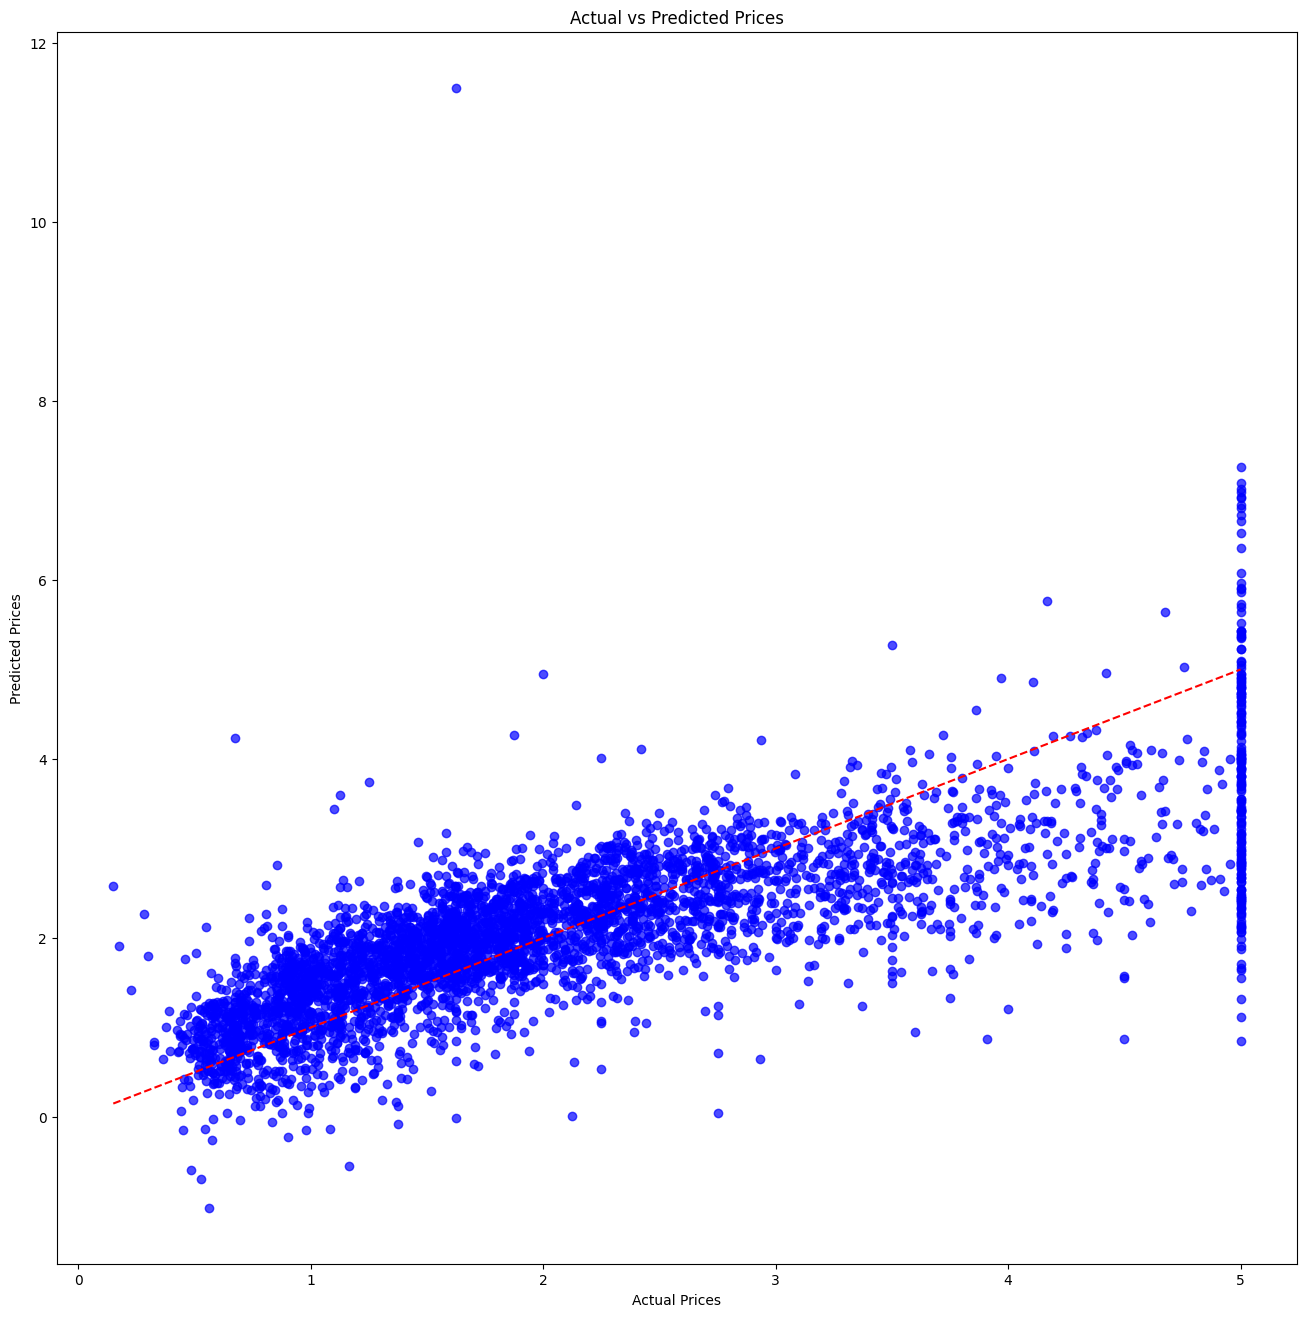

In [18]:
plt.figure(figsize=(16, 16))
plt.scatter(Y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [21]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


sgd = SGDRegressor(max_iter=1000, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
sgd.fit(X_train_scaled,Y_train)
y_pred = sgd.predict(X_test_scaled)

print("SGD Regressor Results")
print(f"MSE: {mean_squared_error(Y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_pred)}")
print(f"R2 Score: {r2_score(Y_test,y_pred)}")
mse = mean_squared_error(Y_test, y_pred)
rmse = mse ** 0.5
print("RMSE: ",rmse)


SGD Regressor Results
MSE: 0.533309127132602
Mean Absolute Error: 0.5241344913657118
R2 Score: 0.5930208538035819
RMSE:  0.7302801702994557


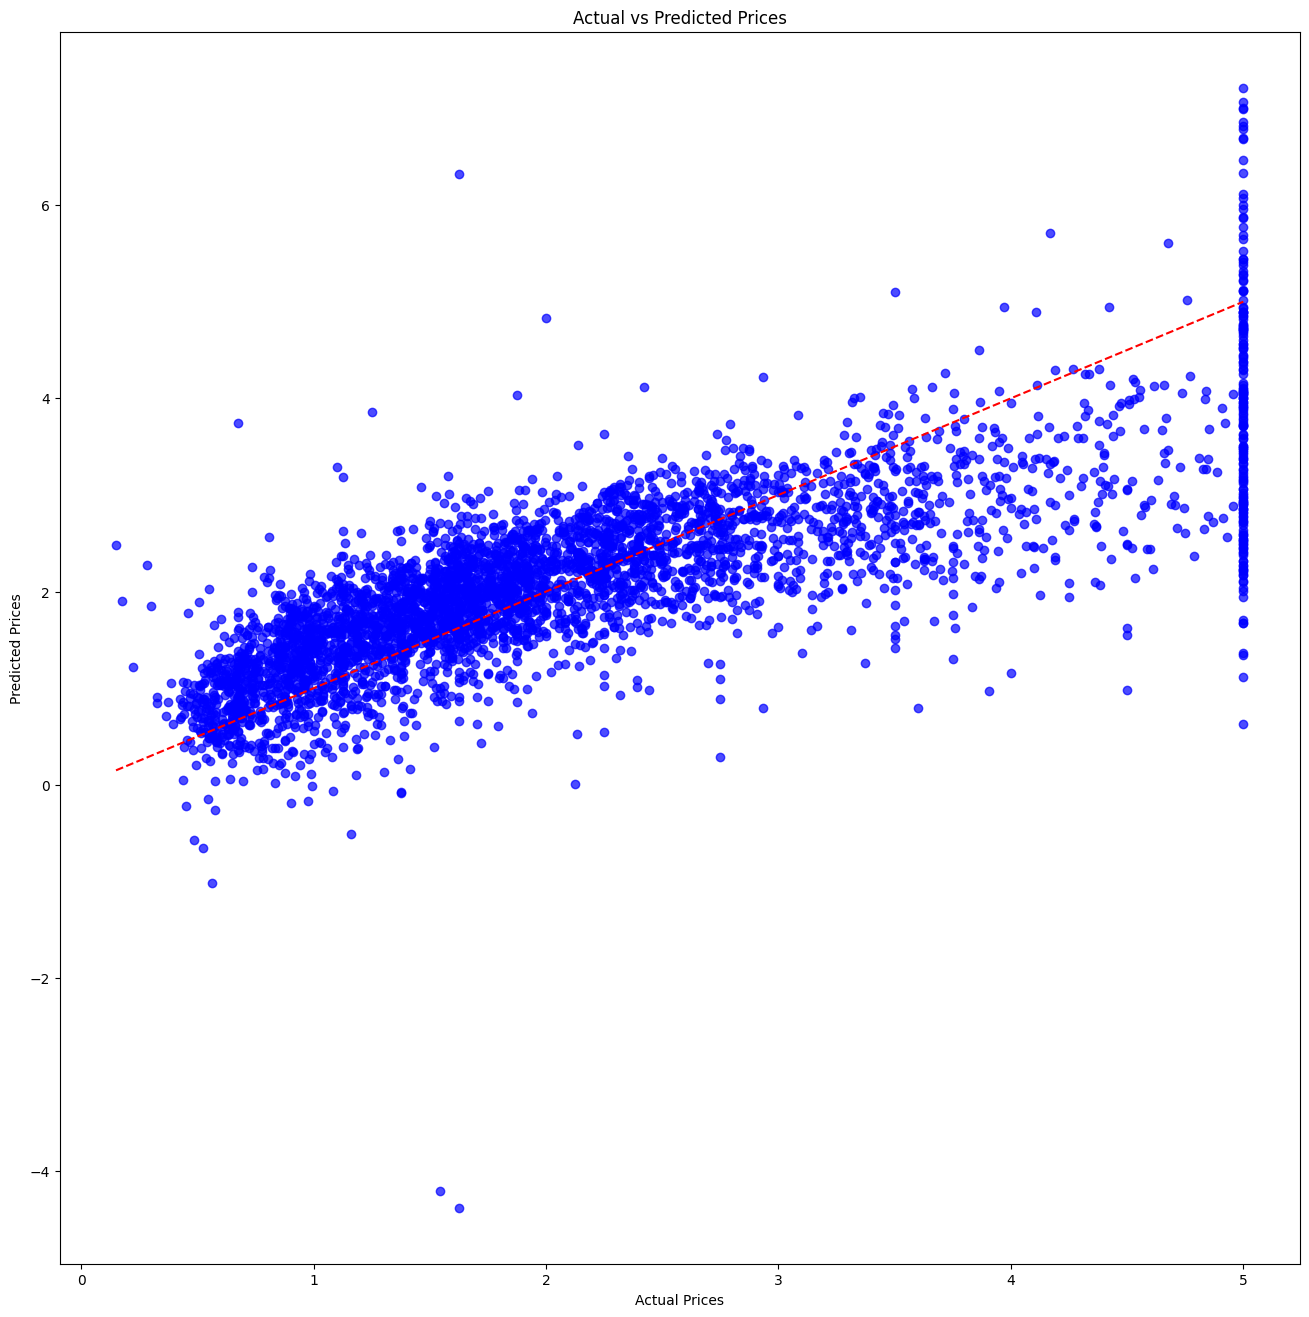

In [22]:
plt.figure(figsize=(16, 16))
plt.scatter(Y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#### Comparison of Linear Regression and SGD Regressor

| Model               | MSE         | MAE         | R² Score    | RMSE       |
|--------------------|------------|------------|------------|------------|
| Linear Regression   | 0.5559     | 0.5332     | 0.5758     | 0.7456     |
| SGD Regressor       | 0.5333     | 0.5241     | 0.5930     | 0.7303     |

**Observations:**  
- SGD Regressor slightly outperforms Linear Regression in all metrics.  
- Lower MSE, MAE, and RMSE indicate better predictive accuracy.  
- Higher R² shows that SGD explains more variance in the target.  
- Scaling the features is important for SGD to achieve stable performance.


#### K-fold Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lr = LinearRegression()
sgd = SGDRegressor(max_iter=5000, tol=1e-3, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cv_results_lr = cross_validate(lr, X_scaled, Y, cv=kf, scoring=scoring, return_train_score=False)
cv_results_sgd = cross_validate(sgd, X_scaled, Y, cv=kf, scoring=scoring, return_train_score=False)

mse_lr = -np.mean(cv_results_lr['test_neg_mean_squared_error'])
mae_lr = -np.mean(cv_results_lr['test_neg_mean_absolute_error'])
rmse_lr = np.sqrt(mse_lr)
r2_lr = np.mean(cv_results_lr['test_r2'])

mse_sgd = -np.mean(cv_results_sgd['test_neg_mean_squared_error'])
mae_sgd = -np.mean(cv_results_sgd['test_neg_mean_absolute_error'])
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = np.mean(cv_results_sgd['test_r2'])

print("5-Fold Cross-Validation Results")
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model","MSE","MAE","RMSE","R2"))
print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Linear Regression", mse_lr, mae_lr, rmse_lr, r2_lr))
print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("SGD Regressor", mse_sgd, mae_sgd, rmse_sgd, r2_sgd))

5-Fold Cross-Validation Results
Model                MSE        MAE        RMSE       R2        
Linear Regression    0.5306     0.5317     0.7284     0.6014    
SGD Regressor        28553824.1420 983.6089   5343.5778  -20956453.2086


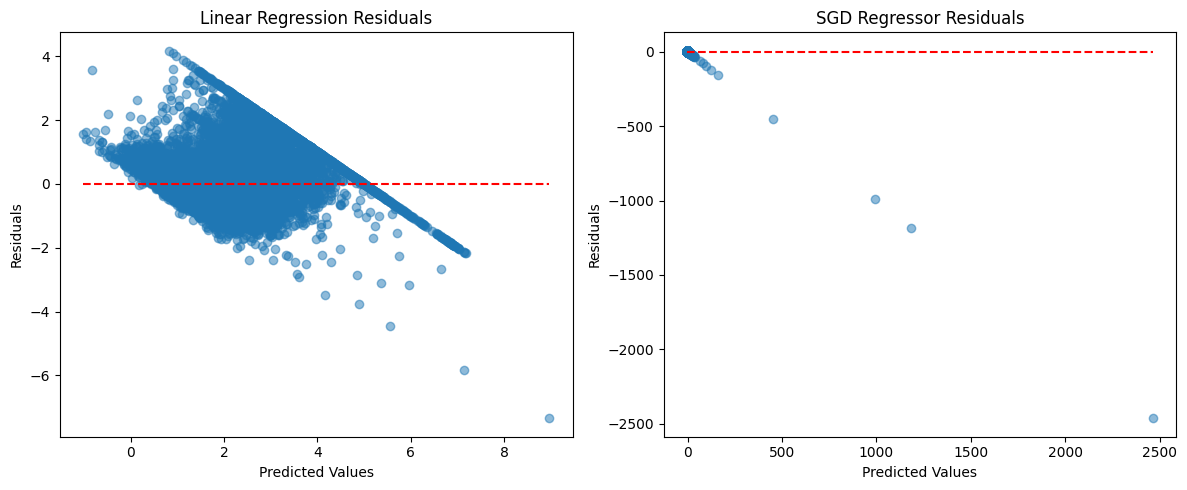

In [28]:
import matplotlib.pyplot as plt

lr.fit(X, Y)
y_pred_lr = lr.predict(X)
residuals_lr = Y - y_pred_lr

sgd.fit(X_scaled, Y)
y_pred_sgd = sgd.predict(X_scaled)
residuals_sgd = Y - y_pred_sgd

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.hlines(0, min(y_pred_lr), max(y_pred_lr), colors='r', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")

plt.subplot(1,2,2)
plt.scatter(y_pred_sgd, residuals_sgd, alpha=0.5)
plt.hlines(0, min(y_pred_sgd), max(y_pred_sgd), colors='r', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("SGD Regressor Residuals")

plt.tight_layout()
plt.show()


**Observations:**  
- Linear Regression is generally more stable due to its closed-form solution.  
- SGD Regressor may achieve slightly higher predictive performance with proper feature scaling.  
- The cross-validation results should confirm the trends observed in the single train-test split.
